In [36]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message
    

In [39]:
data=[]
conversation='WhatsApp Chat with +91 96459.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [40]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head(50)

,Date,Time,contact,Message,positive,negative,neutral
0,2023-01-04,11:00,+91 70321 96459,Hiiii lalitha,0.000,0.000,1.000
1,2023-01-04,11:00,+91 70321 96459,Iam Supraja,0.000,0.000,1.000
2,2023-01-04,11:01,+91 70321 96459,Ninna Jntu meet ayyanu kadha,0.000,0.000,1.000
3,2023-01-04,11:01,Lalitha Priya,Hello..👋,0.000,0.000,1.000
4,2023-01-04,11:02,+91 70321 96459,Acknowledgement echaru ninna,0.000,0.000,1.000
5,2023-01-04,11:02,+91 70321 96459,Enni days ki vellali,0.000,0.000,1.000
6,2023-01-04,11:02,+91 70321 96459,Malli jntu ki,0.000,0.000,1.000
7,2023-01-04,11:03,Lalitha Priya,Date em icharu daantlo..?,0.000,0.000,1.000
8,2023-01-04,11:03,+91 70321 96459,<Media omitted>,0.000,0.000,1.000
9,2023-01-04,11:04,Lalitha Priya,raasaru ga.. 22/4/23 tharvatha vellali..,0.000,0.000,1.000


In [41]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutral")

score(x,y,z)

Neutral


There are 187480 words in all the messages.


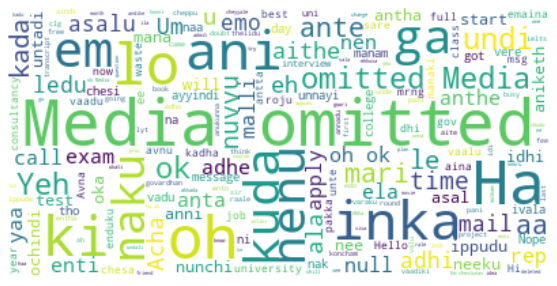

In [30]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()